In [1]:
!pip install spacy
!pip install wordcloud

     ---------------------------------------- 12.2/12.2 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB 1.1 MB/s eta 0:00:00
     ------------------------------------ 483.8/483.8 kB 819.4 kB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 kB 1.2 MB/s eta 0:00:00
     ------------------------------------ 122.7/122.7 kB 450.0 kB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 507.0 kB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 415.0 kB/s eta 0:00:00
     ---------------------------------------- 45.0/45.0 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.5
    Uninstalling colorama-0.4.5:
      Successfully uninstalled colorama-0.4.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [19]:
!python -m spacy download en_core_web_sm


     -------------------------------------- 12.8/12.8 MB 361.9 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
import spacy

nlp = spacy.load('en_core_web_sm')


In [32]:
import pandas as pd
import string

In [5]:
afinn = pd.read_csv(r'C:\Users\Kashi\Downloads\Afinn.csv', sep=',', encoding='latin-1')
afinn[1500:2000]


,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
1995,serene,2
1996,severe,-2
1997,sexy,3
1998,shaky,-2


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


In [12]:
df = pd.read_csv(r'C:\Users\Kashi\Downloads\Elon_musk.csv', encoding='latin-1')

In [13]:
df = [x.strip() for x in df.x] # remove both the leading and the trailing characters
df = [x for x in df if x]

In [14]:
import nltk
from nltk import tokenize
nltk.download("punkt")
sentences = tokenize.sent_tokenize(" ".join(df))
sentences

C:\Users\Kashi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kashi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [15]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [16]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [17]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [21]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            print(word, sentiment_lexicon.get(word.lemma_, 0))
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [22]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.
@kunalb11 0
Im 0
an 0
alien 0
@ID_AA_Carmack 0
Ray 0
tracing 0
on 0
Cyberpunk 0
with 0
HDR 0
is 0
next 0
- 0
level 0
. 0
Have you tried it?
Have 0
you 0
tried 0
it 0
? 0
@joerogan @Spotify Great interview!
@joerogan 0
@Spotify 0
Great 3
interview 0
! 0
@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.
@gtera27 0
Doge 0
is 0
underestimated -1
@teslacn 0
Congratulations 0
Tesla 0
China 0
for 0
amazing 4
execution 0
last 0
year 0
. 0
Now on to the next for even more!!
Now 0
on 0
to 0
the 0
next 0
for 0
even 0
more 0
! 0
! 0
Happy New Year of the Ox!
Happy 0
New 0
Year 0
of 0
the 0
Ox 0
! 0
https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all.
https://t.co/9WFKMYu2oj 0
Frodo 0
was 0
the 0
underdoge 0
, 0

 0
All 0
thought 0
he 0
would 0
fail -2
, 0

 0
Himself 0
most 0
of 0
all 0
. 0
https://t.co/zGxJFDzzrM @O

Have to look at old notes, emails, texts.
Have 0
to 0
look 0
at 0
old 0
notes 0
, 0
emails 0
, 0
texts 0
. 0
@AstroJordy Yes Lessons learned Of Earth and Mars Time to tell the story of Tesla &amp; SpaceX @TheOnion Have you read @TheBabylonBee?
@AstroJordy 0
Yes 1
Lessons 0
learned 0
Of 0
Earth 0
and 0
Mars 0
Time 0
to 0
tell 0
the 0
story 0
of 0
Tesla 0
& 0
amp 0
; 0
SpaceX 0
@TheOnion 0
Have 0
you 0
read 0
@TheBabylonBee 0
? 0
Its great!!
Its 0
great 3
! 0
! 0
The Second Last Kingdom https://t.co/Je4EI88HmV @DumDin7 @Grimezsz Havent heard that name in years @Grimezsz Dogecake YOLT

https://t.co/cnOf9yjpF1 @Kristennetten Thats Damian @Kristennetten Yeah @OwenSparks_ Sure The great thing about restaurants is that you get to hang out with strangers!
The 0
Second 0
Last 0
Kingdom 0
https://t.co/Je4EI88HmV 0
@DumDin7 0
@Grimezsz 0
Havent 0
heard 0
that 0
name 0
in 0
years 0
@Grimezsz 0
Dogecake 0
YOLT 0


 0
https://t.co/cnOf9yjpF1 0
@Kristennetten 0
Thats 0
Damian 0
@Kristennetten 0

@thejackbeyer @NASASpaceflight Cryoproof, then install engines Starship SN9 &amp; SN10 https://t.co/urtPJn7amo In retrospect, it was inevitable @RGVaerialphotos Great shot @its_menieb Live by the sword, die by the sword @lexfridman Entropy @teslaownersSV @GameSpot Buy &amp; hold companies that make goods &amp; produce services you love @engineers_feed Earth is small &amp; we are smaller still https://t.co/gTOhcLGJ82 @GameSpot <U+0001F440> With Cyberpunk, even the hotfixes literally have hotfixes, but  great game https://t.co/a6kmk0PEgM @DocumentingBTC The dollar is shorting itself @westcoastbill Indeed @JohnnaCrider1 @Iupsychdoctor @AOC @RobinhoodApp Shopify is great too.
@thejackbeyer 0
@NASASpaceflight 0
Cryoproof 0
, 0
then 0
install 0
engines 0
Starship 0
SN9 0
& 0
amp 0
; 0
SN10 0
https://t.co/urtPJn7amo 0
In 0
retrospect 0
, 0
it 0
was 0
inevitable 0
@RGVaerialphotos 0
Great 0
shot -1
@its_menieb 0
Live 0
by 0
the 0
sword 0
, 0
die -3
by 0
the 0
sword 0
@lexfridman 0
Entropy 0
@

Only o https://t.co/CeoFLi8Lzm @Megaconstellati @Aviation_Intel @jetcitystar @larrypress Yup @TeslaGong @teslaownersSV @cleantechnica I hope so @Tesmanian_com These also have laser links between the satellites, so no ground stations are needed over the poles @teslaownersSV @cleantechnica Sorry for the version confusion.
Only 0
o 0
  0
https://t.co/CeoFLi8Lzm 0
@Megaconstellati 0
@Aviation_Intel 0
@jetcitystar 0
@larrypress 0
Yup 0
@TeslaGong 0
@teslaownersSV 0
@cleantechnica 0
I 0
hope 2
so 0
@Tesmanian_com 0
These 0
also 0
have 0
laser 0
links 0
between 0
the 0
satellites 0
, 0
so 0
no -1
ground 0
stations 0
are 0
needed 0
over 0
the 0
poles 0
@teslaownersSV 0
@cleantechnica 0
Sorry 0
for 0
the 0
version 0
confusion 0
. 0
V8.1 is what it should say for FSD.
V8.1 0
is 0
what 0
it 0
should 0
say 0
for 0
FSD 0
. 0
Separate version number for rest of car.
Separate 0
version 0
number 0
for 0
rest 0
of 0
car 0
. 0
@cleantechnica To my surprise, Tesla has better AI hardware &amp; software 

@skorusARK Prototypes are easy, volume production is hard, positive cash flow is  excruciating @Tesla Physics RT @SpaceX: Splashdown of Dragon confirmed, completing SpaceXs 21st @Space_Station resupply mission and the first return of a cargo resupp @Erdayastronaut Detanking &amp; inspections now.
@skorusARK 0
Prototypes 0
are 0
easy 1
, 0
volume 0
production 0
is 0
hard -1
, 0
positive 2
cash 0
flow 0
is 0
  0
excruciating 0
@Tesla 0
Physics 0
RT 0
@SpaceX 0
: 0
Splashdown 0
of 0
Dragon 0
confirmed 0
, 0
completing 0
SpaceXs 0
21st 0
@Space_Station 0
resupply 0
mission 0
and 0
the 0
first 0
return 0
of 0
a 0
cargo 0
resupp 0
@Erdayastronaut 0
Detanking 0
& 0
amp 0
; 0
inspections 0
now 0
. 0
Good progress towards our Hop in &amp; go to Mars! goal.
Good 3
progress 2
towards 0
our 0
Hop 0
in 0
& 0
amp 0
; 0
go 0
to 0
Mars! 0
goal 0
. 0
All three static fires completed &amp; no RUDs!
All 0
three 0
static 0
fires -2
completed 0
& 0
amp 0
; 0
no -1
RUDs 0
! 0
@justpaulinelol @Erdayast

@Erdayastronaut @lexfridman Or at least the option for verification, so that the public can ascribe more credibilit https://t.co/jU4WemVsjG Launch underway https://t.co/wbk7ZZ0Fqx Btw, critical feedback is always super appreciated, as well as ways to donate money that really make a difference (way harder than it seems) @eugenelee3 @engineers_feed Yup @engineers_feed Indirectly, an electric rocket is possible by using electricity to convert CO2+H2O &gt; CH4+O2.
@Erdayastronaut 0
@lexfridman 0
Or 0
at 0
least 0
the 0
option 0
for 0
verification 0
, 0
so 0
that 0
the 0
public 0
can 0
ascribe 0
more 0
credibilit 0
  0
https://t.co/jU4WemVsjG 0
Launch 0
underway 0
https://t.co/wbk7ZZ0Fqx 0
Btw 0
, 0
critical 0
feedback 0
is 0
always 0
super 3
appreciated 2
, 0
as 0
well 0
as 0
ways 0
to 0
donate 0
money 0
that 0
really 0
make 0
a 0
difference 0
( 0
way 0
harder -1
than 0
it 0
seems 0
) 0
@eugenelee3 0
@engineers_feed 0
Yup 0
@engineers_feed 0
Indirectly 0
, 0
an 0
electric 0
rocket 0
is 

Thats very far from Brande https://t.co/M7DYvli4cx @Tesmanian_com This is very sensible.
Thats 0
very 0
far 0
from 0
Brande 0
  0
https://t.co/M7DYvli4cx 0
@Tesmanian_com 0
This 0
is 0
very 0
sensible 0
. 0
Opposition from anywhere cannot mean no progress everywhere!
Opposition 0
from 0
anywhere 0
can 0
not 0
mean 0
no -1
progress 2
everywhere 0
! 0
@harsimranbansal Literally @tobyliiiiiiiiii Are we sure this is real?
@harsimranbansal 0
Literally 0
@tobyliiiiiiiiii 0
Are 0
we 0
sure 0
this 0
is 0
real 0
? 0
Destiny, destiny
No escaping 
that for me All Tesla cars delivered in the final three days of the year will get three months of the Full Self-Driving option https://t.co/PPaEreeo8y @SpaceNews_Inc And Mark Dankberg.
Destiny 0
, 0
destiny 0

 0
No -1
escaping -1

 0
that 0
for 0
me 0
All 0
Tesla 0
cars 0
delivered 0
in 0
the 0
final 0
three 0
days 0
of 0
the 0
year 0
will 0
get 0
three 0
months 0
of 0
the 0
Full 0
Self 0
- 0
Driving 0
option 0
  0
https://t.co/PPaEreeo8y 0
@Spac

Theres some great AI out ther https://t.co/v8mUhEApOQ Star Light, Star Bright https://t.co/6CeTAZSXCO @Teslarati @13ericralph31 This is incorrect @TheBabylonBee <U+0001F923><U+0001F923> @pcgamer But it is visually stunning &amp; playability is good @pcgamer A t-shirt being better armor than a Kevlar chest plate doesnt make sense in the absence of magic.
Theres 0
some 0
great 3
AI 0
out 0
ther 0
  0
https://t.co/v8mUhEApOQ 0
Star 0
Light 0
, 0
Star 0
Bright 0
https://t.co/6CeTAZSXCO 0
@Teslarati 0
@13ericralph31 0
This 0
is 0
incorrect 0
@TheBabylonBee 0
< 0
U+0001F923><U+0001F923 0
> 0
@pcgamer 0
But 0
it 0
is 0
visually 0
stunning 4
& 0
amp 0
; 0
playability 0
is 0
good 3
@pcgamer 0
A 0
t 0
- 0
shirt 0
being 0
better 0
armor 0
than 0
a 0
Kevlar 0
chest 0
plate 0
doesnt 0
make 0
sense 0
in 0
the 0
absence 0
of 0
magic 0
. 0
Also, w https://t.co/IYdKttVsqk @cleantechnica Oh and umm  https://t.co/jtg944ERCy @cleantechnica I absolutely support trans, but all these pronouns are an 

Watch as the NASA @SpaceX cargo resupply mission docks to the @Space_Statio @NASASpaceflight Knock, knock, singing telegram!
Watch 0
as 0
the 0
NASA 0
@SpaceX 0
cargo 0
resupply 0
mission 0
docks 0
to 0
the 0
@Space_Statio 0
@NASASpaceflight 0
Knock 0
, 0
knock 0
, 0
singing 0
telegram 0
! 0
@lexfridman Carrying even more symbiotic bacteria (~40 trillion) than cells @AdamKlotz_ @lexfridman Yes @lexfridman We are mobile cell colonies 100 RT @SpaceX: Tracking footage from a helicopter of todays Falcon 9 launch off LC-39A https://t.co/7rYVZRTS18 RT @Erdayastronaut: Theres something genuinely magical about seeing #Starship #SN8 in person.
@lexfridman 0
Carrying 0
even 0
more 0
symbiotic 0
bacteria 0
( 0
~40 0
trillion 0
) 0
than 0
cells 0
@AdamKlotz 0
_ 0
@lexfridman 0
Yes 1
@lexfridman 0
We 0
are 0
mobile 0
cell 0
colonies 0
100 0
RT 0
@SpaceX 0
: 0
Tracking 0
footage 0
from 0
a 0
helicopter 0
of 0
todays 0
Falcon 0
9 0
launch 0
off 0
LC-39A 0
https://t.co/7rYVZRTS18 0
RT 0
@Erdayastro

Depends on how Starship progress goes.
Depends 0
on 0
how 0
Starship 0
progress 2
goes 0
. 0
@RationalEtienne @MarcusHouseGame Not yet @StarshipFairing @MarcusHouseGame Not bad!
@RationalEtienne 0
@MarcusHouseGame 0
Not 0
yet 0
@StarshipFairing 0
@MarcusHouseGame 0
Not 0
bad -3
! 0
We will definitely need more engines if we make the cargo bay all propel https://t.co/j2uVULTatv @MarcusHouseGame Rapid &amp; complete rocket reuse, low cost propellant, orbital refilling &amp; propellant production at d https://t.co/UmyUR7yShY @Erdayastronaut @PPathole @Teslarati @TeslaRoadTrip Yes @PPathole @Teslarati @TeslaRoadTrip Were still far from simply video in, control out.
We 0
will 0
definitely 0
need 0
more 0
engines 0
if 0
we 0
make 0
the 0
cargo 0
bay 0
all 0
propel 0
  0
https://t.co/j2uVULTatv 0
@MarcusHouseGame 0
Rapid 0
& 0
amp 0
; 0
complete 0
rocket 0
reuse 0
, 0
low 0
cost 0
propellant 0
, 0
orbital 0
refilling 0
& 0
amp 0
; 0
propellant 0
production 0
at 0
d 0
  0
https://t.co/Umy

Lot of fundamental improvements, both important bug fixes &amp; entire n https://t.co/BV5STdWNgj @westcoastbill @SpaceX 13 years &amp; $11 billion  wow @OwenSparks_ @flcnhvy @Tesla Safety is our primary design goal @PPathole @AstroJordy @flcnhvy Fully @Astronomiaum Let the Martians decide their own future @shifthappends @Tesla A lot of my brain space is spent dealing with both units!
Lot 0
of 0
fundamental 0
improvements 2
, 0
both 0
important 2
bug 0
fixes 0
& 0
amp 0
; 0
entire 0
n 0
  0
https://t.co/BV5STdWNgj 0
@westcoastbill 0
@SpaceX 0
13 0
years 0
& 0
amp 0
; 0
$ 0
11 0
billion 0
  0
wow 4
@OwenSparks 0
_ 0
@flcnhvy 0
@Tesla 0
Safety 0
is 0
our 0
primary 0
design 0
goal 0
@PPathole 0
@AstroJordy 0
@flcnhvy 0
Fully 0
@Astronomiaum 0
Let 0
the 0
Martians 0
decide 0
their 0
own 0
future 0
@shifthappends 0
@Tesla 0
A 0
lot 0
of 0
my 0
brain 0
space 0
is 0
spent 0
dealing 0
with 0
both 0
units 0
! 0
@Astronomiaum Terraforming will be too slow to be relevant in our lifetime.
@Astr

@ChrisG_NSF Special permission received from Stonecutters Guild!
@ChrisG_NSF 0
Special 0
permission 0
received 0
from 0
Stonecutters 0
Guild 0
! 0
https://t.co/SW5RBm1sRB @JohnnaCrider1 @timmerenginerd @jack Fate <U+0001F5A4> Irony @jack Well said.
https://t.co/SW5RBm1sRB 0
@JohnnaCrider1 0
@timmerenginerd 0
@jack 0
Fate 0
< 0
U+0001F5A4 0
> 0
Irony 0
@jack 0
Well 0
said 0
. 0
@trylolli @Maisie_Williams <U+0001F47B> <U+0001F4B5> 
https://t.co/UWerAhxUev @Erdayastronaut @rweb11742 Damn, thats not easy!
@trylolli 0
@Maisie_Williams 0
< 0
U+0001F47B 0
> 0
< 0
U+0001F4B5 0
> 0

 0
https://t.co/UWerAhxUev 0
@Erdayastronaut 0
@rweb11742 0
Damn 0
, 0
thats 0
not 0
easy 1
! 0
I spent quite a bit of time looking at Russian/Ukrainian engines.
I 0
spent 0
quite 0
a 0
bit 0
of 0
time 0
looking 0
at 0
Russian 0
/ 0
Ukrainian 0
engines 0
. 0
Theyre good.
Theyre 0
good 3
. 0
@PPathole @michaelmina_lab Yes RT @SpaceX: Docking confirmed  Crew Dragon has arrived at the @space_station!
@PPathole 0
@

Feels just like a regular cold, but more body achy &amp; cloudy head than co https://t.co/ihVPeox7m6 @michaelmina_lab In your opinion, at what Ct number for the cov2 N1 gene should a PCR test probably be regarded as https://t.co/emuXLx698G @michaelmina_lab @stendeck77 !
Feels 0
just 0
like 2
a 0
regular 0
cold 0
, 0
but 0
more 0
body 0
achy 0
& 0
amp 0
; 0
cloudy 0
head 0
than 0
co 0
  0
https://t.co/ihVPeox7m6 0
@michaelmina_lab 0
In 0
your 0
opinion 0
, 0
at 0
what 0
Ct 0
number 0
for 0
the 0
cov2 0
N1 0
gene 0
should 0
a 0
PCR 0
test 0
probably 0
be 0
regarded 0
as 0
  0
https://t.co/emuXLx698 0
G 0
@michaelmina_lab 0
@stendeck77 0
! 0
@teslaownerssv Cool, but please be super cautious.
@teslaownerssv 0
Cool 1
, 0
but 0
please 1
be 0
super 3
cautious -1
. 0
Expect two steps forward, one back.
Expect 0
two 0
steps 0
forward 0
, 0
one 0
back 0
. 0
Lot of new code was merged.
Lot 0
of 0
new 0
code 0
was 0
merged 0
. 0
@austinbarnard45 Just a scratch.
@austinbarnard45 0
Just 0
a 0
sc

@BLKMDL3 If its happening to me, its happening to others.
@BLKMDL3 0
If 0
its 0
happening 0
to 0
me 0
, 0
its 0
happening 0
to 0
others 0
. 0
Im getting PCR tests from separate labs.
Im 0
getting 0
PCR 0
tests 0
from 0
separate 0
labs 0
. 0
Results will take about 24 hours.
Results 0
will 0
take 0
about 0
24 0
hours 0
. 0
Something extremely bogus is going on.
Something 0
extremely 0
bogus 0
is 0
going 0
on 0
. 0
Was tested for covid four times today.
Was 0
tested 0
for 0
covid 0
four 0
times 0
today 0
. 0
Two tests came back negative, two cam https://t.co/Z2V15u7Zcf @austinbarnard45 Burst disk worked, so vehicle appears to be ok. Well have to swap out at least one of the engines.
Two 0
tests 0
came 0
back 0
negative -2
, 0
two 0
cam 0
  0
https://t.co/Z2V15u7Zcf 0
@austinbarnard45 0
Burst 0
disk 0
worked 0
, 0
so 0
vehicle 0
appears 0
to 0
be 0
ok 0
. 0
Well 0
have 0
to 0
swap 0
out 0
at 0
least 0
one 0
of 0
the 0
engines 0
. 0
@tobyliiiiiiiiii @SpacePadreIsle @austinbarnard

Very different from labeling single phot https://t.co/mLTBdsQuTy @PPathole @cleantechnica Version 1 is about a year away @RenataKonkoly @SpaceNews_Inc It would appear that their calculations were incorrect @SpaceNews_Inc China understands the profound importance of reusability.
Very 0
different 0
from 0
labeling 0
single 0
phot 0
  0
https://t.co/mLTBdsQuTy 0
@PPathole 0
@cleantechnica 0
Version 0
1 0
is 0
about 0
a 0
year 0
away 0
@RenataKonkoly 0
@SpaceNews_Inc 0
It 0
would 0
appear 0
that 0
their 0
calculations 0
were 0
incorrect 0
@SpaceNews_Inc 0
China 0
understands 0
the 0
profound 0
importance 2
of 0
reusability 0
. 0
The era of expendable rockets will soon be over.
The 0
era 0
of 0
expendable 0
rockets 0
will 0
soon 0
be 0
over 0
. 0
@cleantechnica <U+2660><U+FE0F><U+2660><U+FE0F> Tesla Autopilot/AI team <U+2660><U+FE0F><U+2660><U+FE0F> @cleantechnica Good explanation.
@cleantechnica 0
< 0
U+2660><U+FE0F><U+2660><U+FE0F 0
> 0
Tesla 0
Autopilot 0
/ 0
AI 0
team 0
< 0
U+2660><U+

Even the small details matter.
Even 0
the 0
small 0
details 0
matter 1
. 0
@engineers_feed Haha Very close to actual expected flight!
@engineers_feed 0
Haha 0
Very 0
close 0
to 0
actual 0
expected 0
flight 0
! 0
https://t.co/ruEdIPhTil @Nigel_Lockyer I could not be more excited about the new supercollider!
https://t.co/ruEdIPhTil 0
@Nigel_Lockyer 0
I 0
could 0
not 0
be 0
more 0
excited 3
about 0
the 0
new 0
supercollider 0
! 0
That said, while it is considerably larger, https://t.co/s3typirk4U @WholeMarsBlog @steezyysosa @AustinTeslaClub @JoeTegtmeyer @peterdog15 @TXTerafactory @Terafactorytx @lqdchkn https://t.co/pqsjZOPAj5 @steezyysosa @AustinTeslaClub @JoeTegtmeyer @peterdog15 @TXTerafactory @Terafactorytx @lqdchkn @jd_average https://t.co/oZAzv1iGXa @AustinTeslaClub @JoeTegtmeyer @peterdog15 @TXTerafactory @Terafactorytx @lqdchkn @jd_average @EliBurton_ Tesla Tex https://t.co/g2INiRy9ES @kyzcralotSxaM Yes Penguin Random House <U+0001F634> should change the name to Random Pengui

? @coffeemaestro_ <U+0001F923><U+0001F923> Come here  no, come, here <U+0001F447> Wow, this mayo sure is salty!
? 0
 0
@coffeemaestro 0
_ 0
< 0
U+0001F923><U+0001F923 0
> 0
Come 0
here 0
  0
no -1
, 0
come 0
, 0
here 0
< 0
U+0001F447 0
> 0
Wow 4
, 0
this 0
mayo 0
sure 0
is 0
salty 0
! 0
@PPathole @pcgamer Max Payne was great on many levels.
@PPathole 0
@pcgamer 0
Max 0
Payne 0
was 0
great 3
on 0
many 0
levels 0
. 0
Silent Hill good too.
Silent 0
Hill 0
good 3
too 0
. 0
Jack in the Box should do double duty as a sperm donor clinic  name is <U+0001F44C> @TheWPMontgomery @pcgamer One of the best games ever @ThatDudeShannon @pcgamer FEAR 1 with modern graphics &amp; sound would rock @1matthewgarcia @pcgamer Ok :) @ZZCOOL @pcgamer All games in this thread are far scarier &amp; more creatively so than any horror movie @pcgamer FEAR 2 is best imo.
Jack 0
in 0
the 0
Box 0
should 0
do 0
double 0
duty 0
as 0
a 0
sperm 0
donor 0
clinic 0
 0
name 0
is 0
< 0
U+0001F44C 0
> 0
@TheWPMontgomery 

@lexfridman Nice What is love?
@lexfridman 0
Nice 0
What 0
is 0
love 3
? 0
Baby dont hurt me. Winston Churchill @PlayOverwatch @twomad Or maybe 2 weak turrets to allow more strategic degrees of freedom @PlayOverwatch @twomad Please buff Torbs turret!
Baby 0
dont 0
hurt -2
me. 0
Winston 0
Churchill 0
@PlayOverwatch 0
@twomad 0
Or 0
maybe 0
2 0
weak -2
turrets 0
to 0
allow 1
more 0
strategic 0
degrees 0
of 0
freedom 2
@PlayOverwatch 0
@twomad 0
Please 1
buff 0
Torbs 0
turret 0
! 0
@twomad Um  yes @teslaownersSV I have Goosebumps 2 merch.
@twomad 0
Um 0
  0
yes 1
@teslaownersSV 0
I 0
have 0
Goosebumps 0
2 0
merch 0
. 0
Not sure how tbh.
Not 0
sure 0
how 0
tbh 0
. 0
@teslaownersSV HG2G @teslaownersSV LotR <U+0001F918> The Illuminaughty <U+0001F918> @ChotiHaque @BillGates @DougStanhope @bobdylan @charltonbrooker @EricIdle @JimCarrey @JohnCleese @sapinker Knee deep RT @SpaceX: This will be the first flight of the upgraded cargo version of Dragon, which is able to carry 50% more s

@Neopork85 @Caspar_Stanley @ErcXspace @MarcusHouseGame @FelixSchlang @C_Bass3d @nickhenning3d @SpaceX Our tiles are mechanically attached @flcnhvy @Neopork85 @Caspar_Stanley @ErcXspace @MarcusHouseGame @FelixSchlang @C_Bass3d @nickhenning3d @SpaceX It m https://t.co/wHXamj12IQ @Neopork85 @Caspar_Stanley @ErcXspace @MarcusHouseGame @FelixSchlang @C_Bass3d @nickhenning3d @SpaceX Tiles will be https://t.co/XPnQrCXQNc @ID_AA_Carmack Compilers need to improve imo.
@Neopork85 0
@Caspar_Stanley 0
@ErcXspace 0
@MarcusHouseGame 0
@FelixSchlang 0
@C_Bass3d 0
@nickhenning3d 0
@SpaceX 0
Our 0
tiles 0
are 0
mechanically 0
attached 0
@flcnhvy 0
@Neopork85 0
@Caspar_Stanley 0
@ErcXspace 0
@MarcusHouseGame 0
@FelixSchlang 0
@C_Bass3d 0
@nickhenning3d 0
@SpaceX 0
It 0
m 0
  0
https://t.co/wHXamj12IQ 0
@Neopork85 0
@Caspar_Stanley 0
@ErcXspace 0
@MarcusHouseGame 0
@FelixSchlang 0
@C_Bass3d 0
@nickhenning3d 0
@SpaceX 0
Tiles 0
will 0
be 0
  0
https://t.co/XPnQrCXQNc 0
@ID_AA_Carmack 0
Compilers 0
nee

You do st https://t.co/g5DLCmG7wC @skorusARK Marginal cost of Starship mass to orbit should be well under $100/kg.
You 0
do 0
st 0
  0
https://t.co/g5DLCmG7wC 0
@skorusARK 0
Marginal 0
cost 0
of 0
Starship 0
mass 0
to 0
orbit 0
should 0
be 0
well 0
under 0
$ 0
100 0
/ 0
kg 0
. 0
Fully burdened cost depends on flight rate.
Fully 0
burdened -2
cost 0
depends 0
on 0
flight 0
rate 0
. 0
@WholeMarsBlog Prototypes are a piece of cake, but high volume production of a new technology is extremely hard.
@WholeMarsBlog 0
Prototypes 0
are 0
a 0
piece 0
of 0
cake 0
, 0
but 0
high 0
volume 0
production 0
of 0
a 0
new 0
technology 0
is 0
extremely 0
hard -1
. 0
Ta https://t.co/O1oJwfJ2zG @WholeMarsBlog We do expect to make heavy use of LFP for medium range cars &amp; stationary storage @WholeMarsBlog Berlin will use 4680 cell with structural battery pack &amp; front &amp; rear single piece castings.
Ta 0
  0
https://t.co/O1oJwfJ2zG 0
@WholeMarsBlog 0
We 0
do 0
expect 0
to 0
make 0
heavy 0
use 0
o

@TeslaClubIN @WholeMarsBlog @MKBHD Next year for sure @tobyliiiiiiiiii @RationalEtienne @SPEXcast @William_M_Brown @PPathole @thesheetztweetz @waEMD @SpaceX https://t.co/ZFBqLHXK3F @RationalEtienne @SPEXcast @William_M_Brown @PPathole @thesheetztweetz @waEMD @SpaceX @SpaceXStarlink https://t.co/hSCBeF8MNf @SPEXcast @William_M_Brown @RationalEtienne @PPathole @thesheetztweetz @waEMD @SpaceX @SpaceXStarlink @WANationalGuard Great @William_M_Brown @RationalEtienne @PPathole @thesheetztweetz @waEMD @SpaceX @SpaceXStarlink @WANationalGuard Browns https://t.co/ggoEsDif2J @PPathole @thesheetztweetz @waEMD @SpaceX @SpaceXStarlink @WANationalGuard Average latency will improve as more sat https://t.co/piqitzEIa5 @tobyliiiiiiiiii @RationalEtienne @PPathole @thesheetztweetz @waEMD @SpaceX @SpaceXStarlink @WANationalGuard Very s https://t.co/EtjXxIv2vq @RationalEtienne @PPathole @thesheetztweetz @waEMD @SpaceX @SpaceXStarlink @WANationalGuard Yes, Starlink is design https://t.co/r4RRGVpvR0 @P

SN9 will https://t.co/wpePRV5S4r @NASASpaceflight @austinbarnard45 @PPathole 8 bar differential in ullage, 9 bar at base due to propellant head.
SN9 0
will 0
  0
https://t.co/wpePRV5S4r 0
@NASASpaceflight 0
@austinbarnard45 0
@PPathole 0
8 0
bar 0
differential 0
in 0
ullage 0
, 0
9 0
bar 0
at 0
base 0
due 0
to 0
propellant 0
head 0
. 0
It https://t.co/QvGKYW2qd0 @PPathole We just need enough height to test body flaps &amp; drawing propellant from headers vs main tanks.
It 0
  0
https://t.co/QvGKYW2qd0 0
@PPathole 0
We 0
just 0
need 0
enough 0
height 0
to 0
test 0
body 0
flaps 0
& 0
amp 0
; 0
drawing 0
propellant 0
from 0
headers 0
vs 0
main 0
tanks 0
. 0
Will do se https://t.co/PGzAfeSC7X First flight is to 15km or ~50,000 ft Nosecone &amp; front flaps next week.
Will 0
do 0
se 0
  0
https://t.co/PGzAfeSC7X 0
First 0
flight 0
is 0
to 0
15 0
km 0
or 0
~50,000 0
ft 0
Nosecone 0
& 0
amp 0
; 0
front 0
flaps 0
next 0
week 0
. 0
SN9 next month.
SN9 0
next 0
month 0
. 0
Starship SN8 w

This affects long-term production, especially Semi, Cybertr https://t.co/FO4xHXAs9Q @EvaFoxU Thanks!
This 0
affects 0
long 0
- 0
term 0
production 0
, 0
especially 0
Semi 0
, 0
Cybertr 0
  0
https://t.co/FO4xHXAs9Q 0
@EvaFoxU 0
Thanks 0
! 0
@Neopork85 @SpaceX @MarcusHouseGame We really need better legs for Starship.
@Neopork85 0
@SpaceX 0
@MarcusHouseGame 0
We 0
really 0
need 0
better 0
legs 0
for 0
Starship 0
. 0
Theyre coming.
Theyre 0
coming 0
. 0
@Neopork85 @SpaceX @MarcusHouseGame Most likely, all flaps will fold after landing to reduce wind tip over force.
@Neopork85 0
@SpaceX 0
@MarcusHouseGame 0
Most 0
likely 0
, 0
all 0
flaps 0
will 0
fold 0
after 0
landing 0
to 0
reduce 0
wind 0
tip 0
over 0
force 0
. 0
T https://t.co/DyNlT5EKGk @Model3Owners Fine, well do it already <U+0001F600> @ARKInvest @TashaARK Good analysis, although I think we should wait until FSD is a bit more mature @singing__surfer Im pretty sure Tesla could do a much better autocorrect.
T 0
  0
https://t.

Doubles as an underground nuclear shelter <U+0001F600><U+0001F44D> https://t.co/CvI0YRjObE @flcnhvy @lexfridman Yeah @tesladri @ID_AA_Carmack @lexfridman Should be happening soon @ID_AA_Carmack @lexfridman A bit more obscure, but Starhammer &amp; Stainless Steel Rat @engineers_feed At first, I thought that was a parrot @JohnnaCrider1 @jhall They remind me of these guys https://t.co/Qt502U08np Story of my life https://t.co/Vn0Rv0yQ5q Tunnels under cities with self-driving electric cars will feel like warp drive

First operational tunnel under Vega https://t.co/wIZYhEd6Pa @jackfarrington For sure @jackfarrington @Tesla Good point Have you hugged a tunnel today?
Doubles 0
as 0
an 0
underground 0
nuclear 0
shelter 0
< 0
U+0001F600><U+0001F44D 0
> 0
https://t.co/CvI0YRjObE 0
@flcnhvy 0
@lexfridman 0
Yeah 1
@tesladri 0
@ID_AA_Carmack 0
@lexfridman 0
Should 0
be 0
happening 0
soon 0
@ID_AA_Carmack 0
@lexfridman 0
A 0
bit 0
more 0
obscure 0
, 0
but 0
Starhammer 0
& 0
amp 0
; 0
Stainless 0
Ste

@flcnhvy <U+0001F1E9><U+0001F1EA> Natürlich <U+0001F1E9><U+0001F1EA> Bitte arbeiten Sie bei Tesla Giga Berlin!
@flcnhvy 0
< 0
U+0001F1E9><U+0001F1EA 0
> 0
Natürlich 0
< 0
U+0001F1E9><U+0001F1EA 0
> 0
Bitte 0
arbeiten 0
Sie 0
bei 0
Tesla 0
Giga 0
Berlin 0
! 0
Es wird super Spaß machen!!
Es 0
wird 0
super 3
Spaß 0
machen 0
! 0
! 0
https://t.co/FcNoPr2oII @MonicaLewinsky Try a Tesla &amp; youre welcome to give it back if you decide you prefer a Subaru @slashdot Vera Rubin Observatory is cool @PPathole @eugenelee3 @UniverCurious 1+1=2 @CharlieMunger00 @UniverCurious Munger is right @eugenelee3 @UniverCurious https://t.co/f8rWY4ExeE @UniverCurious Black-Scholes formula is kinda bs.
https://t.co/FcNoPr2oII 0
@MonicaLewinsky 0
Try 0
a 0
Tesla 0
& 0
amp 0
; 0
youre 0
welcome 2
to 0
give 0
it 0
back 0
if 0
you 0
decide 0
you 0
prefer 0
a 0
Subaru 0
@slashdot 0
Vera 0
Rubin 0
Observatory 0
is 0
cool 1
@PPathole 0
@eugenelee3 0
@UniverCurious 0
1 0
+ 0
1=2 0
@CharlieMunger00 0
@UniverCurious 0


Its https://t.co/IxhyT6NuiC @Teslarati Tesla Germany designed &amp; built the vaccine RNA printers for CureVac, but, subject to some CureVac IP, th https://t.co/X32SdA871G @engineers_feed Technically, James Watt measured a pony, added 50% &amp; rounded up haha https://t.co/vnkO0MTrUC @flcnhvy @GerberKawasaki Also, Critical Thinking @flcnhvy @GerberKawasaki Alexander and the Rise of Hellenism and Film Studies @GerberKawasaki Wow, I super loved astronomy (but took it at Queens, not Penn)!
Its 0
  0
https://t.co/IxhyT6NuiC 0
@Teslarati 0
Tesla 0
Germany 0
designed 0
& 0
amp 0
; 0
built 0
the 0
vaccine 0
RNA 0
printers 0
for 0
CureVac 0
, 0
but 0
, 0
subject 0
to 0
some 0
CureVac 0
IP 0
, 0
th 0
  0
https://t.co/X32SdA871 0
G 0
@engineers_feed 0
Technically 0
, 0
James 0
Watt 0
measured 0
a 0
pony 0
, 0
added 0
50 0
% 0
& 0
amp 0
; 0
rounded 0
up 0
haha 3
https://t.co/vnkO0MTrUC 0
@flcnhvy 0
@GerberKawasaki 0
Also 0
, 0
Critical 0
Thinking 0
@flcnhvy 0
@GerberKawasaki 0
Alexander 0
a

The Big Bang started very, very smol https://t.co/XVvcuALZ2o https://t.co/8R92iEXVvN @PPathole Asimov was <U+0001F525><U+0001F525> Should we believe things proportionate to the evidence that they are true?
The 0
Big 0
Bang 0
started 0
very 0
, 0
very 0
smol 0
https://t.co/XVvcuALZ2o 0
https://t.co/8R92iEXVvN 0
@PPathole 0
Asimov 0
was 0
< 0
U+0001F525><U+0001F525 0
> 0
Should 0
we 0
believe 0
things 0
proportionate 0
to 0
the 0
evidence 0
that 0
they 0
are 0
true 0
? 0
(yes) Olde skoole analog synthesizer from ancient Britain https://t.co/JG0fI3ChxC @slashdot https://t.co/WoIwia7zTn @Kristennetten @flcnhvy Was just there &amp; weather was calm.
( 0
yes 1
) 0
Olde 0
skoole 0
analog 0
synthesizer 0
from 0
ancient 0
Britain 0
https://t.co/JG0fI3ChxC 0
@slashdot 0
https://t.co/WoIwia7zTn 0
@Kristennetten 0
@flcnhvy 0
Was 0
just 0
there 0
& 0
amp 0
; 0
weather 0
was 0
calm 2
. 0
Sure hope it stays that way!
Sure 0
hope 2
it 0
stays 0
that 0
way 0
! 0
@Teslarati Tesla brake lights are powere

https://t.co/zTRMvQ6Wvx He might run for President in 2024 https://t.co/Wo34fhKugu @Erdayastronaut @nextspaceflight Not having long chain hydrocarbons &amp; lowering preburner combustion temperature make a big difference @EverydayElon @ajtourville @comma_ai @Tesmanian_com Yes @WholeMarsBlog @ajtourville @comma_ai @Tesmanian_com Yes @DanielleFong @ajtourville @comma_ai @Tesmanian_com Absolutely needs liquid cooling.
https://t.co/zTRMvQ6Wvx 0
He 0
might 0
run 0
for 0
President 0
in 0
2024 0
https://t.co/Wo34fhKugu 0
@Erdayastronaut 0
@nextspaceflight 0
Not 0
having 0
long 0
chain 0
hydrocarbons 0
& 0
amp 0
; 0
lowering 0
preburner 0
combustion 0
temperature 0
make 0
a 0
big 1
difference 0
@EverydayElon 0
@ajtourville 0
@comma_ai 0
@Tesmanian_com 0
Yes 1
@WholeMarsBlog 0
@ajtourville 0
@comma_ai 0
@Tesmanian_com 0
Yes 1
@DanielleFong 0
@ajtourville 0
@comma_ai 0
@Tesmanian_com 0
Absolutely 0
needs 0
liquid 0
cooling 0
. 0
Were applying our experience https://t.co/EzlAXWg3rp @TeslaTested

We just havent observed the https://t.co/mezrzCneWO @universal_sci Pretty much Cybertruck option package https://t.co/6Vz4XNoHf9 @SteveStuWill @jagarikin Wow @Booster_Buddies @NASASpaceflight My button-twiddling makes no sense at all <U+0001F923><U+0001F923> @flcnhvy @nickcappelli @Grimezsz You got it
https://t.co/F2rXGcz964 @EvaFoxU Thats a great one Tanks 4 the memery - panzer of the lake Some big milestones coming up https://t.co/K3v3yddg6J @DrPhiltill Africa is big @AwardsDarwin Bold move, sir, bold move @EuricSanti @luisabinader @Tesla Thank you, Tesla is most honored!
We 0
just 0
havent 0
observed 0
the 0
  0
https://t.co/mezrzCneWO 0
@universal_sci 0
Pretty 1
much 0
Cybertruck 0
option 0
package 0
https://t.co/6Vz4XNoHf9 0
@SteveStuWill 0
@jagarikin 0
Wow 4
@Booster_Buddies 0
@NASASpaceflight 0
My 0
button 0
- 0
twiddling 0
makes 0
no -1
sense 0
at 0
all 0
< 0
U+0001F923><U+0001F923 0
> 0
@flcnhvy 0
@nickcappelli 0
@Grimezsz 0
You 0
got 0
it 0

 0
https://t.co/F2rXGcz964 

@TimFernholz Nobody would suggest buying airplanes that only fly once &amp; then crash into the ocean.
@TimFernholz 0
Nobody 0
would 0
suggest 0
buying 0
airplanes 0
that 0
only 0
fly 0
once 0
& 0
amp 0
; 0
then 0
crash -2
into 0
the 0
ocean 0
. 0
That would be absurd @Tesmanian_com I generally try my best not to be on patents @TimFernholz Efficiently reusable rockets are all that matter for making life multiplanetary &amp; space power.
That 0
would 0
be 0
absurd 0
@Tesmanian_com 0
I 0
generally 0
try 0
my 0
best 3
not 0
to 0
be 0
on 0
patents 0
@TimFernholz 0
Efficiently 0
reusable 0
rockets 0
are 0
all 0
that 0
matter 1
for 0
making 0
life 0
multiplanetary 0
& 0
amp 0
; 0
space 0
power. 0
Becau https://t.co/AlG6Ue95vE @WholeMarsBlog Will be amazing to see it in operation!
Becau 0
  0
https://t.co/AlG6Ue95vE 0
@WholeMarsBlog 0
Will 0
be 0
amazing 4
to 0
see 0
it 0
in 0
operation 0
! 0
Biggest casting machine ever made.
Biggest 1
casting 0
machine 0
ever 0
made 0
. 0
Will make re

Starship SN5 has launched on a 150 meter test hop at SpaceX Boca Chica.
Starship 0
SN5 0
has 0
launched 0
on 0
a 0
150 0
meter 0
test 0
hop 0
at 0
SpaceX 0
Boca 0
Chica 0
. 0
Under the power of Raptor SN27, SN5 h @SciGuySpace Exactly @austinbarnard45 Mars is looking real @TrevorMahlmann Possible flight in 3 mins @Erdayastronaut Most likely @flcnhvy @Lindw0rm @cleantechnica True @Lindw0rm @cleantechnica Highly likely down the road @cleantechnica True fact @NASASpaceflight Scrubbed for the day.
Under 0
the 0
power 0
of 0
Raptor 0
SN27 0
, 0
SN5 0
h 0
@SciGuySpace 0
Exactly 0
@austinbarnard45 0
Mars 0
is 0
looking 0
real 0
@TrevorMahlmann 0
Possible 0
flight 0
in 0
3 0
mins 0
@Erdayastronaut 0
Most 0
likely 0
@flcnhvy 0
@Lindw0rm 0
@cleantechnica 0
True 0
@Lindw0rm 0
@cleantechnica 0
Highly 0
likely 0
down 0
the 0
road 0
@cleantechnica 0
True 0
fact 0
@NASASpaceflight 0
Scrubbed 0
for 0
the 0
day 0
. 0
A Raptor turbopump spin start valve didnt open, triggering an automatic abo https://t

<U+0001F5A4><U+0001F9DB><U+200D><U+2640><U+FE0F>Total Eclipse of the Heart <U+0001F9DB><U+200D><U+2640><U+FE0F><U+0001F5A4> https://t.co/n8djdlKnbE @lnterestingMaps @Iearnsomethlng <U+0001F62E> @bluemoondance74 @PPathole @flcnhvy @shravantr @Neuro_Skeptic Not that Im aware of @PPathole @flcnhvy @shravantr @Neuro_Skeptic Yes.
< 0
U+0001F5A4><U+0001F9DB><U+200D><U+2640><U+FE0F 0
> 0
Total 0
Eclipse 0
of 0
the 0
Heart 0
< 0
U+0001F9DB><U+200D><U+2640><U+FE0F><U+0001F5A4 0
> 0
https://t.co/n8djdlKnbE 0
@lnterestingMaps 0
@Iearnsomethlng 0
< 0
U+0001F62E 0
> 0
@bluemoondance74 0
@PPathole 0
@flcnhvy 0
@shravantr 0
@Neuro_Skeptic 0
Not 0
that 0
Im 0
aware 0
of 0
@PPathole 0
@flcnhvy 0
@shravantr 0
@Neuro_Skeptic 0
Yes 1
. 0
Could also extend range of hearing beyond normal frequencies and amplitudes.
Could 0
also 0
extend 1
range 0
of 0
hearing 0
beyond 0
normal 0
frequencies 0
and 0
amplitudes 0
. 0
Deus Ex.
Deus 0
Ex 0
. 0
@flcnhvy @shravantr @Neuro_Skeptic Neuralinks are currently meant 

@SciGuySpace Competition ensures companies work hard to serve the needs of their customers @schristakos @PUBG Something fun is coming @vincent13031925 @UniversalPics @TomCruise @SpaceX Could be great!
@SciGuySpace 0
Competition 0
ensures 1
companies 0
work 0
hard -1
to 0
serve 0
the 0
needs 0
of 0
their 0
customers 0
@schristakos 0
@PUBG 0
Something 0
fun 4
is 0
coming 0
@vincent13031925 0
@UniversalPics 0
@TomCruise 0
@SpaceX 0
Could 0
be 0
great 3
! 0
@teslaownersSV @cleantechnica Thats a great idea!
@teslaownersSV 0
@cleantechnica 0
Thats 0
a 0
great 3
idea 0
! 0
@Tesla We are actually looking for revolutionary actuaries for Tesla Insurance!
@Tesla 0
We 0
are 0
actually 0
looking 0
for 0
revolutionary 0
actuaries 0
for 0
Tesla 0
Insurance 0
! 0
Please inquire, if interested.
Please 1
inquire 0
, 0
if 0
interested 2
. 0
@cleantechnica Tbh, we are just a bit less foolish than before RT @Commercial_Crew: While in orbit, astronauts @AstroBehnken and @Astro_Doug performed a habitabilit

Left by myself when I was 17.
Left -1
by 0
myself 0
when 0
I 0
was 0
17 0
. 0
@businessinsider True, the 2012 Model S is still a great car.
@businessinsider 0
True 0
, 0
the 0
2012 0
Model 0
S 0
is 0
still 0
a 0
great 3
car 0
. 0
Was driving SN28 a few months ago and driving feel wa https://t.co/mrUtLE8Y2V RT @businessinsider: Tesla's Model 3 received top marks from safety organizations in North America, Europe, and Australia https://t.co/NB92 @teslaownersSV @stephenpallotta Will discuss on Wed earnings call.
Was 0
driving 0
SN28 0
a 0
few 0
months 0
ago 0
and 0
driving 0
feel 0
wa 0
  0
https://t.co/mrUtLE8Y2V 0
RT 0
@businessinsider 0
: 0
Tesla 0
's 0
Model 0
3 0
received 0
top 2
marks 0
from 0
safety 1
organizations 0
in 0
North 0
America 0
, 0
Europe 0
, 0
and 0
Australia 0
https://t.co/NB92 0
@teslaownersSV 0
@stephenpallotta 0
Will 0
discuss 0
on 0
We 0
d 0
earnings 0
call 0
. 0
Lots to talk about!
Lots 0
to 0
talk 0
about 0
! 0
@stephenpallotta <U+0001F923><U+0001F923> @a_howa

@teslaownersSV @engineers_feed The strength &amp; perseverance of the people of Tesla, despite facing extreme difficulties @engineers_feed Playable on any Tesla!
@teslaownersSV 0
@engineers_feed 0
The 0
strength 2
& 0
amp 0
; 0
perseverance 0
of 0
the 0
people 0
of 0
Tesla 0
, 0
despite 0
facing 0
extreme 0
difficulties 0
@engineers_feed 0
Playable 0
on 0
any 0
Tesla 0
! 0
@EfficiencyLast @jaminwestby @teslaownersSV @jgrano305 @TeslaratiTeam @Teslarati Should do this automatically @thesheetztweetz @BryceSpaceTech @SpaceX @ulalaunch @torybruno @MHI_Group @roscosmos Mass to orbit is a more accura https://t.co/ltqH2VuLgc @Teslarati Cute @davidtayar5 @TeslaLisa @SteveHamel16 @vincent13031925 @S_Padival @BarkMSmeagol @annerajb @PJHORNAK @WPipperger @EcoHeliGuy Wow @katlinegrey Reusability is essential.
@EfficiencyLast 0
@jaminwestby 0
@teslaownersSV 0
@jgrano305 0
@TeslaratiTeam 0
@Teslarati 0
Should 0
do 0
this 0
automatically 0
@thesheetztweetz 0
@BryceSpaceTech 0
@SpaceX 0
@ulalaunch 0


In [23]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [24]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [25]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
224,"@PPathole @karpathy For a second there, I thou...",11,69
159,@harsimranbansal @heydave7 It will most likely...,11,93
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
719,We just havent observed the https://t.co/mez...,17,72


In [26]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [27]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [28]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [29]:
sent_df['index']=range(0,len(sent_df))

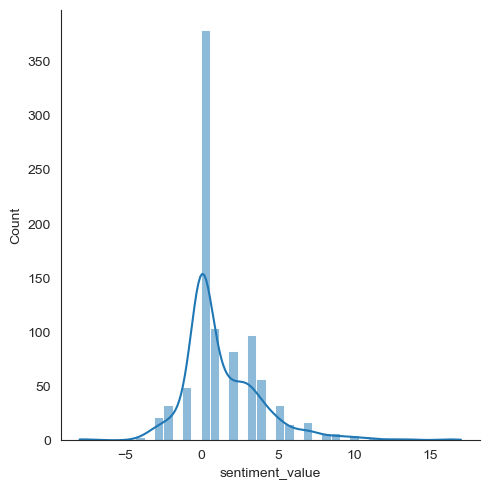

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

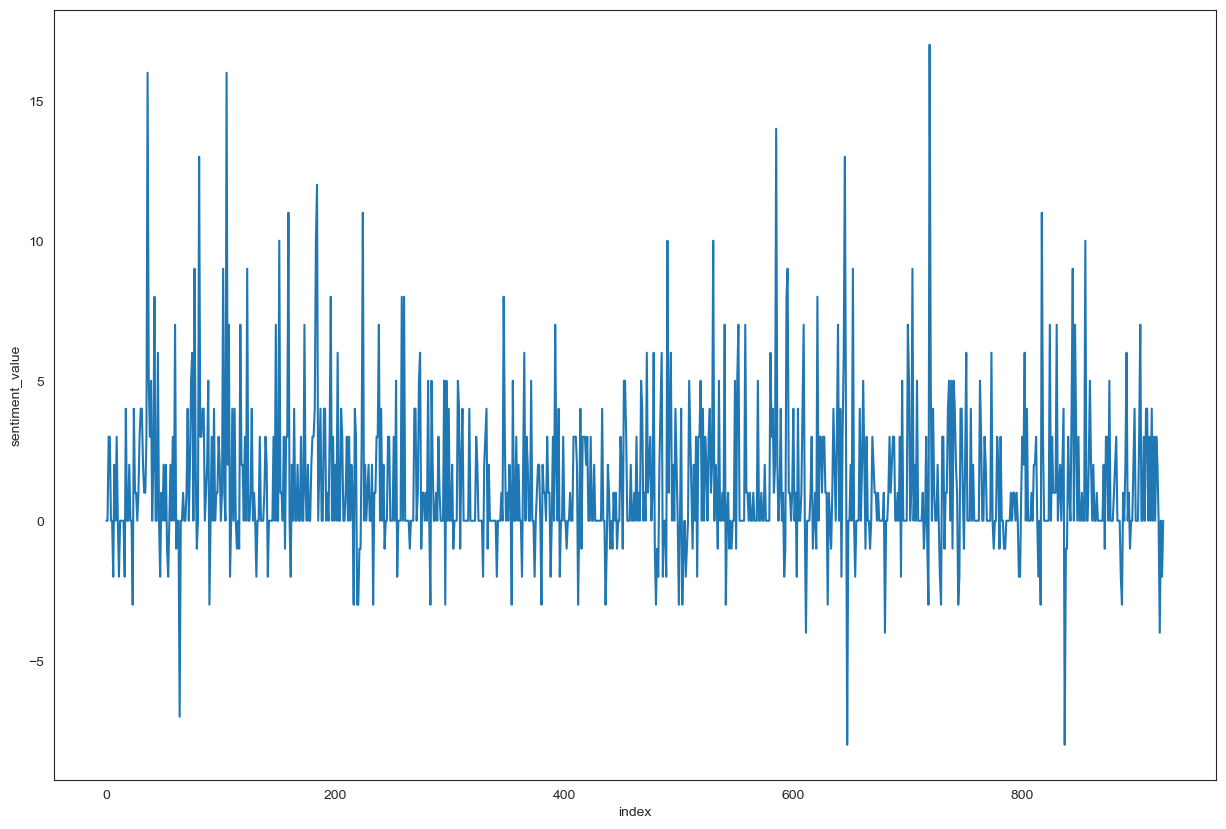

In [34]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

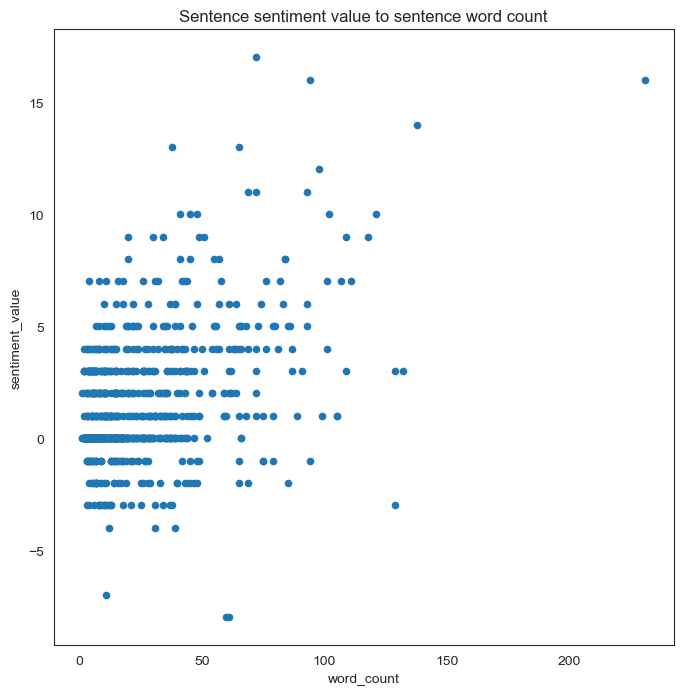

In [35]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')